In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
dataframe=pd.read_csv('sample_data/ecg.csv',header=None)
raw_data=dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [26]:
labels=raw_data[:,-1]

data=raw_data[:,0:-1]
train_data,test_data,train_labels,test_labels=train_test_split(data,labels,test_size=0.2,random_state=21)


In [27]:

min_val=tf.reduce_min(train_data)
max_val=tf.reduce_max(train_data)
train_data=(train_data-min_val)/(max_val-min_val)
test_data=(test_data-min_val)/(max_val-min_val)
train_data=tf.cast(train_data,tf.float32)
test_data=tf.cast(test_data,tf.float32)
test_data.dtype

tf.float32

In [9]:
train_labels=train_labels.astype(bool)
test_labels=test_labels.astype(bool)

normal_train_data = train_data[train_labels==True]
normal_test_data = test_data[test_labels==True]

anomalous_train_data = train_data[train_labels==False]
anomalous_test_data = test_data[test_labels==False]
normal_test_data

<tf.Tensor: shape=(560, 140), dtype=float32, numpy=
array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
        0.3713729 ],
       [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
        0.49527124],
       [0.4521779 , 0.25685105, 0.12592098, ..., 0.55448556, 0.5861353 ,
        0.4754273 ],
       ...,
       [0.48304972, 0.36122933, 0.27729514, ..., 0.32799056, 0.3158066 ,
        0.26930442],
       [0.4090865 , 0.27907097, 0.22604261, ..., 0.39099607, 0.45987615,
        0.42140076],
       [0.42648116, 0.17669384, 0.14546008, ..., 0.4733389 , 0.55036914,
        0.37805188]], dtype=float32)>

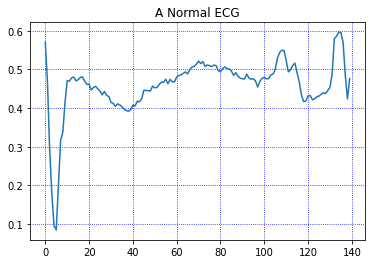

In [28]:
plt.grid(linestyle=":",color="b")
plt.plot(np.arange(140),normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

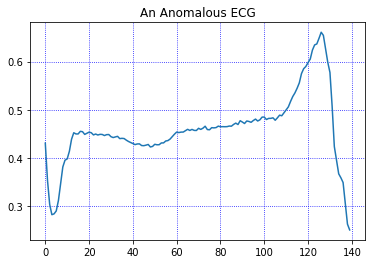

In [11]:
plt.grid(linestyle=":",color="b")
plt.plot(np.arange(140),anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [29]:

class AnomalyDetector(Model):
    def __init__(self):
        #建立神经网络
        super(AnomalyDetector,self).__init__()
        self.encoder=tf.keras.Sequential([layers.Dense(32,activation="relu"),layers.Dense(16,activation="relu"),layers.Dense(8,activation="relu")])
         #建立神经网络
        self.decoder=tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(x)
        return decoded
autoencoder=AnomalyDetector()

autoencoder.compile(optimizer='adam',loss='mae')

In [13]:
history=autoencoder.fit(normal_train_data,normal_train_data,epochs=20,batch_size=512,
                       validation_data=(test_data,test_data),shuffle=True)

Epoch 1/20


5/5 [==============================] - 2s 87ms/step - loss: 0.0613 - val_loss: 0.0541
Epoch 2/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0560 - val_loss: 0.0518
Epoch 3/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0536 - val_loss: 0.0504
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0508 - val_loss: 0.0493
Epoch 5/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0476 - val_loss: 0.0477
Epoch 6/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0440 - val_loss: 0.0454
Epoch 7/20
5/5 [==============================] - 0s 24ms/step - loss: 0.0406 - val_loss: 0.0434
Epoch 8/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0374 - val_loss: 0.0415
Epoch 9/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0343 - val_loss: 0.0399
Epoch 10/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0315 - val_loss: 0.0389
Epoch 11/20
5/5 [=======================

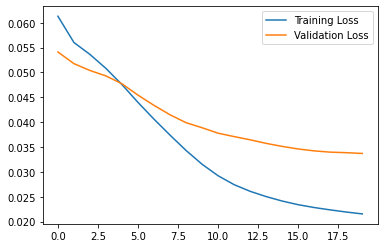

In [14]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

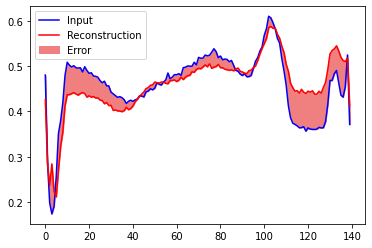

array([[0.06229988, 0.        , 0.45392632, ..., 0.21740931, 0.        ,
        0.        ],
       [0.05237287, 0.        , 0.4081455 , ..., 0.23332137, 0.        ,
        0.        ],
       [0.03012392, 0.        , 0.39885613, ..., 0.22431044, 0.        ,
        0.        ],
       ...,
       [0.02104648, 0.        , 0.36615908, ..., 0.22136039, 0.        ,
        0.        ],
       [0.04838591, 0.        , 0.4102447 , ..., 0.2305256 , 0.        ,
        0.        ],
       [0.04798792, 0.        , 0.42302507, ..., 0.23333636, 0.        ,
        0.        ]], dtype=float32)

In [15]:
encoded_imgs=autoencoder.encoder(normal_test_data).numpy()
decoded_imgs=autoencoder.decoder(normal_test_data).numpy()
plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140),decoded_imgs[0],normal_test_data[0],color='lightcoral')
plt.legend(labels=["Input","Reconstruction","Error"])
plt.show()
encoded_imgs

In [16]:
encoded_imgs=autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs=autoencoder.decoder(anomalous_test_data).numpy()

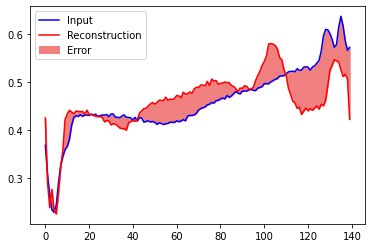

In [17]:
plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140),decoded_imgs[0],anomalous_test_data[0],color='lightcoral')
plt.legend(labels=["Input","Reconstruction","Error"])
plt.show()

In [30]:
reconstructions=autoencoder.predict(normal_train_data)
reconstructions

74/74 [==============================] - 1s 3ms/step


array([[0.4995535 , 0.47116777, 0.43095613, ..., 0.5390595 , 0.5081731 ,
        0.51611894],
       [0.50111705, 0.47326005, 0.42822427, ..., 0.53900117, 0.5078298 ,
        0.5176502 ],
       [0.50009865, 0.47175628, 0.43004867, ..., 0.5393053 , 0.51131576,
        0.51902497],
       ...,
       [0.5010918 , 0.470978  , 0.42642206, ..., 0.541007  , 0.5105458 ,
        0.51941645],
       [0.49911064, 0.4718381 , 0.43181738, ..., 0.53855944, 0.5105507 ,
        0.5178314 ],
       [0.5021123 , 0.47280958, 0.4272507 , ..., 0.5396363 , 0.5100274 ,
        0.5194551 ]], dtype=float32)

In [19]:
train_loss=tf.keras.losses.mae(reconstructions,normal_train_data).numpy()
train_loss

array([0.0276557 , 0.01196396, 0.02078875, ..., 0.01376753, 0.02354907,
       0.01760375], dtype=float32)

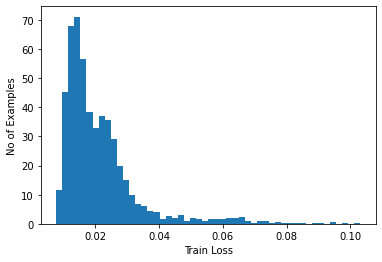

In [31]:
plt.hist(train_loss,bins=50,density=True)
plt.xlabel("Train Loss")
plt.ylabel("No of Examples")
plt.show()

In [21]:
threshold=np.mean(train_loss)+np.std(train_loss)
print("Threshold",threshold)

Threshold 0.03358294


In [22]:
reconstructions=autoencoder.predict(anomalous_test_data)
reconstructions

14/14 [==============================] - 0s 3ms/step


array([[0.42555377, 0.2924274 , 0.23933381, ..., 0.51639795, 0.5064883 ,
        0.42285407],
       [0.42182857, 0.29519883, 0.24515933, ..., 0.5050796 , 0.5031042 ,
        0.42269373],
       [0.42047364, 0.29306433, 0.24184509, ..., 0.5052289 , 0.50087863,
        0.42304966],
       ...,
       [0.4198254 , 0.29351386, 0.2425771 , ..., 0.504064  , 0.5001553 ,
        0.42339575],
       [0.41910103, 0.29739204, 0.2455108 , ..., 0.5023314 , 0.49490824,
        0.42690212],
       [0.43197045, 0.2999637 , 0.24914092, ..., 0.51086324, 0.5099548 ,
        0.41992757]], dtype=float32)

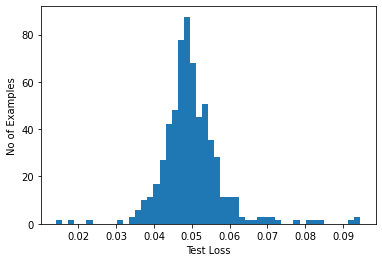

In [23]:
test_loss=tf.keras.losses.mae(reconstructions,anomalous_test_data).numpy()
plt.hist(test_loss,bins=50,density=True)
plt.xlabel("Test Loss")
plt.ylabel("No of Examples")
plt.show()

In [32]:
def predict(model,data,threshold):
    reconstructions=model(data)
    loss=tf.keras.losses.mae(reconstructions,data)
    return tf.math.less(loss,threshold)
def print_stats(prediction,labels):
    print("Accuracy={}".format(accuracy_score(labels,preds)))
    print("Precision={}".format(precision_score(labels,preds)))
    print("Recall={}".format(recall_score(labels,preds)))

In [25]:
preds=predict(autoencoder,test_data,threshold)
print_stats(preds,test_labels)

Accuracy=0.946
Precision=0.9922178988326849
Recall=0.9107142857142857
